# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [66]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode
import statistics
import random
# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [67]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
#cremos una funcion que devuelva la longitud de una variable
def give_len(column):
    return len(column)
#mapeamos la columna titulo con apply y le pasaos la funcion
df["title_length"] = df["title"].apply(give_len)
df


,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",7
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",27
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",47
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",11


In [68]:
# Calcula media, mediana y moda de la columna 'title_length'

#media, calculamos con mean de numpy y rendondeamos
media_titulo = round(np.mean(df["title_length"]), 2)

#mediana, calculamos con median de numpy y rendondeamos
mediana_titulo = round(np.median(df["title_length"]), 2)

#moda, calculamos con mode de scipy y rendondeamos
moda_titulo = round(mode(df["title_length"])[0], 2)
media_titulo, mediana_titulo, moda_titulo

(np.float64(15.48), np.float64(14.0), np.int64(12))

In [69]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'

#Para el rango se puede hacer manual no tiene mucha ciencia obtenemos los valores maximos y minimos con "max" y "min"
max_titulo = df["title_length"].max()
min_titulo = df["title_length"].min()

#Luego restamos el maximo con el minimo y redondeamos
range_titulo=round(max_titulo-min_titulo, 2)

#Varianza, calculamos con variance de statistics y redondeamos
varianza_titulo = round(statistics.variance(df["title_length"]), 2)

#Desviacion Estandar, calculamos con stdev de statistics y redondeamos
desviacion_titulo = round(statistics.stdev(df["title_length"]), 2)
range_titulo, varianza_titulo, varianza_titulo


(np.int64(67), 72.11, 72.11)

In [70]:
# Calcula asimetría y curtosis de la columna 'title_length'

#Asimetria, calculamos con skew de scipy y redondeamos
asimetria_titulo = round(skew(df["title_length"]), 2)

#Kurtosis, calculamos con kurtosis de scipy y redondeamos
curtosis_titulo = round(kurtosis(df["title_length"]), 2)
asimetria_titulo, curtosis_titulo

(np.float64(1.52), np.float64(3.79))

In [71]:
# Imprime el título más corto y el título más largo según su longitud
#Ordenamos los valores por title_length acendente para obtener el titulo mas corto y desendente para otener el titulo mas largo, por supuesto
#Nos quedamos con el primer elemento del resultado del ordenamiento
titulo_corto = df.sort_values(by = "title_length")
titulo_corto = titulo_corto["title"].iloc[0]
titulo_largo = df.sort_values(by="title_length", ascending = False)
titulo_largo = titulo_largo["title"].iloc[0]
titulo_corto, titulo_largo

('M', 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb')

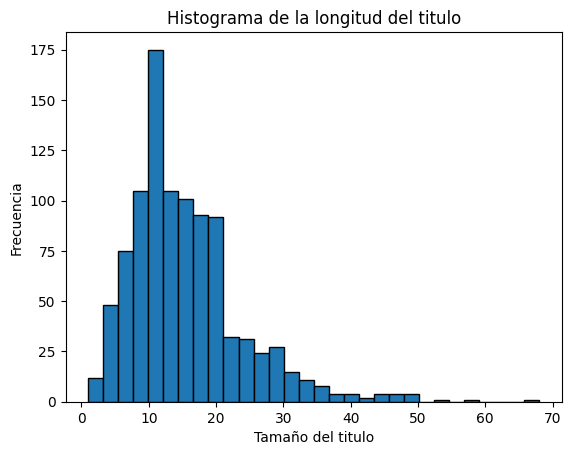

In [72]:
# grafica tus resultados
#Como vimos en clases con un histograma se pueden observar mejor esta estapa de la estadistica descriptiva, podemos observar hacia donde esta orientada
#la campana y ver donde esta la cola y los valores "anormales"
plt.hist(df["title_length"], bins = 30, edgecolor = 'black')
plt.xlabel("Tamaño del titulo")
plt.ylabel("Frecuencia")
plt.title("Histograma de la longitud del titulo")
plt.show()



---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [73]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]

# Decidi usar valores aleatores para los titulos,igual estan comentados los originales por si acaso.
# lista_titulos = [10, 13, 14, 18, 22]
lista_titulos = []
n_filas = df.shape[0]
for i in range(5):
    aux = random.randint(0, n_filas - 1)
    titulo = df["title_length"].iloc[aux] 
    lista_titulos.append(int(titulo))

lista_titulos


[10, 17, 19, 28, 6]

In [74]:
# Calcula la media de los 5 valores

#La media es la sumatoria de todo los valores entre la cantidad de los mismos asi que hacemos un bucle y sumamos
sumatoria = 0
for i in lista_titulos:
    sumatoria += i
#Luego dividimos
media = sumatoria / len(lista_titulos)
media

16.0

In [75]:
# Calcula las diferencias al cuadrado con respecto a la media

#la diferencia se saca restando a cada valor "i" la media, y elevandolo al cuadrado
diferencias = []
for i in lista_titulos:
    #Ya teniammos la media del anterior ejercicio
    aux = round((i - media) ** 2, 2)
    diferencias.append(aux)
diferencias

[36.0, 1.0, 9.0, 144.0, 100.0]

In [76]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación

# Segun https://ecuacionde.com/varianza/ luego de haber sacado las difernecias nos ahorramos un paso y solo hace falta sumarlas todas 
# y dividirlas entre el total para sacar la varianza, casi como si estuvieramos sacando la media.
sumatoria_diferencias = 0
for i in diferencias:
    sumatoria_diferencias += i
varianza = round(sumatoria_diferencias / len(diferencias), 2)
#luego solo le sacamos la raiz cuadrada para obtener la desviacion
desviacion = round(varianza ** 0.5, 2)
varianza, desviacion

(58.0, 7.62)